In [1]:
import mapd_renderer
import ibis
import altair as alt
from vega_datasets import data

TABLE_NAME = "iris"

In [2]:
host = dict(
    host='qs-dev.mapd.com', port='9091', 
    user='mapd', password='HyperInteractive', 
    database='mapd'
)
mapd = ibis.mapd.connect(**host)

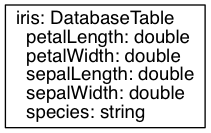

In [3]:
mapd.table(TABLE_NAME)

In [4]:
pandas = ibis.pandas.connect({TABLE_NAME: mapd.table(TABLE_NAME).limit(100).execute()})

# `simple_scatter_plot`

In [5]:
chart = lambda object: alt.Chart(object).mark_point().encode(
    x='petalWidth:Q',
    y='petalLength:Q',
    color='species:O'
)

# Pandas

In [6]:
pandas_expr = pandas.table(TABLE_NAME)

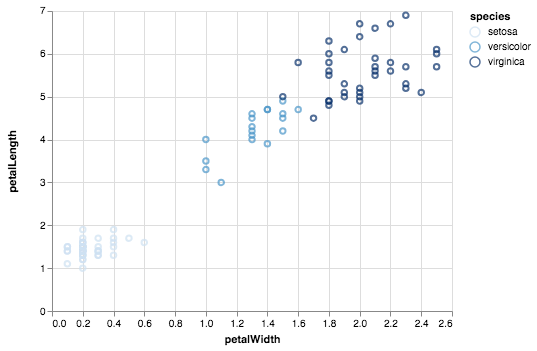

In [7]:
alt.renderers.enable('default')
chart(pandas_expr.execute())

In [8]:
mapd_expr = mapd.table(TABLE_NAME)

# Plotting All the MapD data

## Basic Altair Renderer

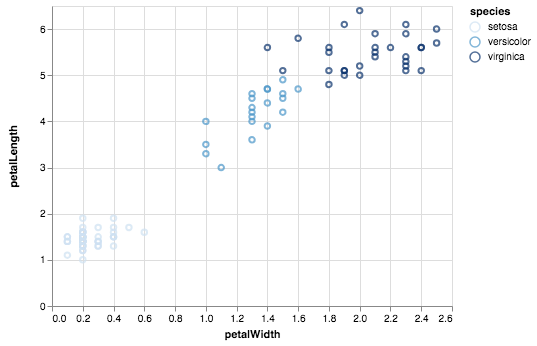

In [9]:
alt.renderers.enable('default')
chart(mapd_expr.limit(100).execute())

## MapD Altair renderer

In [10]:
alt.renderers.enable('mapd', conn=mapd)
chart(mapd_expr.compile())

Chart({
  data: 'SELECT *\nFROM iris',
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'species:O'
    }),
    x: X({
      shorthand: 'petalWidth:Q'
    }),
    y: Y({
      shorthand: 'petalLength:Q'
    })
  }),
  mark: 'point'
})

👆The cell above doesn't render anything👆